# Complete Applied Question #8 on page 286 of ISLR Python. 
In this exercise, we will generate simulated data, and will then use
this data to perform forward and backward stepwise selection.we
rs


In [31]:
import os
os.chdir("C:/Users/ghimi/OneDrive/Desktop/PHD in Data Science/4_Predictive Analysis_TIM8555/Assignment 3")
print(os.getcwd())  # Verify change


C:\Users\ghimi\OneDrive\Desktop\PHD in Data Science\4_Predictive Analysis_TIM8555\Assignment 3


##  Question A 
Create a random number generator and use its normal() method
to generate a predictor X of length n = 100, as well as a noise
vector " of length n = 100..?

In [34]:
import numpy as np

# Set the seed for reproducibility
np.random.seed(42)

# Define the length of the predictor and noise vector
n = 100

# Create the random number generator
rng = np.random.default_rng()

# Generate the predictor X and noise vector epsilon using the normal() method
X = rng.normal(loc=0, scale=1, size=n)  # Normal distribution with mean=0, std=1
epsilon = rng.normal(loc=0, scale=1, size=n)  # Noise vector

# Display the generated data
X[:10], epsilon[:10]  # Display the first 10 values of X and epsilon as a preview


(array([-0.0684253 ,  0.44450854, -1.78124447, -0.79621552,  1.89630884,
        -0.74095761, -0.7361541 , -1.26781504, -0.54099048, -0.84440925]),
 array([-2.33473255,  1.79249167, -0.88604376,  0.26518978,  0.44958101,
         0.57708925,  0.08596864, -1.10783722,  1.18750285, -0.79744961]))

## Generate a response vector Y of length n = 100 according to
?

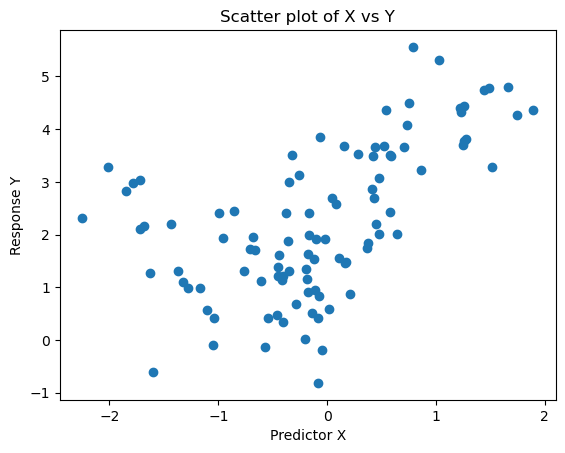

In [37]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Set the seed for reproducibility
np.random.seed(42)

# Define constants for the model
beta_0 = 2    # Example constant
beta_1 = 1.5  # Example constant
beta_2 = 0.5  # Example constant
beta_3 = -0.2  # Example constant
# Define the length of the predictor and noise vector
n = 100

# Create a random number generator
rng = np.random.default_rng()

# Generate the predictor X and noise vector epsilon using the normal() method
X = rng.normal(loc=0, scale=1, size=n)  # Normal distribution with mean=0, std=1
epsilon = rng.normal(loc=0, scale=1, size=n)  # Noise vector

# Display the first 10 values of X and epsilon
X[:10], epsilon[:10]

# Compute the response vector Y
Y = beta_0 + beta_1 * X + beta_2 * (X ** 2) + beta_3 * (X ** 3) + epsilon

# Display the first 10 values of Y
Y[:100]

# Scatter plot of X vs Y
plt.scatter(X, Y)
plt.xlabel('Predictor X')
plt.ylabel('Response Y')
plt.title('Scatter plot of X vs Y')
plt.show()


## Forward Stepwise selection 
To perform forward stepwise selection and select a model containing the predictors 
𝑋,$𝑋^2$, $X^3$,-----,$X^10$, we can use Python's statsmodels or sklearn libraries, but forward stepwise selection isn't built into them by default. However, we can implement forward stepwise selection manually, leveraging model performance metrics like Mallows' $C_p$ 
(a criterion similar to AIC) to find the best model.n

In [40]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from itertools import combinations

# Set the seed for reproducibility
np.random.seed(42)

# Assume X is already defined, as generated in the previous steps
n = 100

# Generate polynomial features X^2, X^3, ..., X^10
X_poly = pd.DataFrame({
    f'X^{i}': X ** i for i in range(1, 11)})

# Add constant term for the intercept in the model
X_poly = sm.add_constant(X_poly)


## Forward Stepwise selection function 

The predictors in the k-variable model identified by backward 
stepwise are a subset of the predictors in the (k + 1)-
variable model identified by backward stepwise selectio

In forward stepwise selection, the k-variable model is always a subset of the (k+1)-variable model. Start with no predictors: Forward stepwise selection begins with an empty model (the null model).

Add one predictor at a time: At each step, it adds the predictor that most improves the model according to some criterion (e.g., AIC, BIC, adjusted 
$𝑅^2$ .

Build up: The process is sequential, meaning that once a predictor is added to the model, it remains in the model in all future steps.n.

In [43]:
# Forward stepwise selection function
def forward_stepwise_selection(X, y):
    remaining_predictors = list(X.columns)
    selected_predictors = []
    best_models = []
    
    while remaining_predictors:
        scores = []
        for predictor in remaining_predictors:
            # Try adding this predictor to the current model
            current_predictors = selected_predictors + [predictor]
            X_selected = X[current_predictors]
            model = sm.OLS(y, X_selected).fit()
            
            # Compute Cp (AIC as a proxy for Cp)
            cp_score = model.aic  # AIC used as a proxy for Cp
            scores.append((cp_score, predictor, model))
        
        # Sort scores, and select the best predictor to add
        scores.sort()
        best_cp, best_predictor, best_model = scores[0]
        remaining_predictors.remove(best_predictor)
        selected_predictors.append(best_predictor)
        best_models.append((best_model, best_cp))
        
        print(f"Added {best_predictor}, Cp = {best_cp:.4f}")
    
    # Return the best model according to Cp
    return best_models[-1][0]

# Split data into response variable and predictors
y = beta_0 + beta_1 * X + beta_2 * (X ** 2) + beta_3 * (X ** 3) + epsilon  # Assuming you have a response
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Apply forward stepwise selection
best_model = forward_stepwise_selection(X_train, y_train)


Added const, Cp = 284.4882
Added X^1, Cp = 256.9389
Added X^2, Cp = 235.5179
Added X^3, Cp = 226.1461
Added X^4, Cp = 227.0444
Added X^6, Cp = 224.0296
Added X^10, Cp = 222.4902
Added X^5, Cp = 223.4223
Added X^8, Cp = 223.8861
Added X^9, Cp = 225.5618
Added X^7, Cp = 227.4519


### Report the coefficient of the selected model

Once we have the best model based on $C_p$ , we can output the coefficients.

In [47]:
# Display the coefficients of the selected model
print(best_model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     11.17
Date:                Tue, 17 Sep 2024   Prob (F-statistic):           4.56e-11
Time:                        21:21:30   Log-Likelihood:                -102.73
No. Observations:                  80   AIC:                             227.5
Df Residuals:                      69   BIC:                             253.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6075      0.209      7.677      0.0

## Reversing the technique , 
Repeat (C)  using backwards stepwise selection
The predictors in the k-variable model identified by backward stepwise .

In [50]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Set the seed for reproducibility
np.random.seed(42)

# Assume X is already defined, as generated in the previous steps
n = 100

# Generate polynomial features X^2, X^3, ..., X^10
X_poly = pd.DataFrame({
    f'X^{i}': X ** i for i in range(1, 11)
})

# Add constant term for the intercept in the model
X_poly = sm.add_constant(X_poly)


In [52]:
# Backward stepwise selection function
def backward_stepwise_selection(X, y):
    selected_predictors = list(X.columns)  # Start with all predictors
    best_models = []
    
    while len(selected_predictors) > 1:
        scores = []
        for predictor in selected_predictors:
            # Try removing this predictor from the current model
            current_predictors = [p for p in selected_predictors if p != predictor]
            X_selected = X[current_predictors]
            model = sm.OLS(y, X_selected).fit()
            
            # Compute Cp (AIC as a proxy for Cp)
            cp_score = model.aic  # AIC used as a proxy for Cp
            scores.append((cp_score, predictor, model))
        
        # Sort scores, and remove the predictor with the worst Cp
        scores.sort()
        best_cp, worst_predictor, best_model = scores[0]
        selected_predictors.remove(worst_predictor)
        best_models.append((best_model, best_cp))
        
        print(f"Removed {worst_predictor}, Cp = {best_cp:.4f}")
    
    # Return the best model according to Cp
    return best_models[-1][0]

# Split data into response variable and predictors
y = beta_0 + beta_1 * X + beta_2 * (X ** 2) + beta_3 * (X ** 3) + epsilon  # Assuming you have a response
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Apply backward stepwise selection
best_model = backward_stepwise_selection(X_train, y_train)


Removed X^3, Cp = 225.4887
Removed X^4, Cp = 223.6779
Removed X^7, Cp = 221.7573
Removed X^5, Cp = 219.9928
Removed X^10, Cp = 231.8284
Removed X^8, Cp = 230.3238
Removed X^6, Cp = 229.3374
Removed X^9, Cp = 235.5179
Removed X^2, Cp = 256.9389
Removed X^1, Cp = 284.4882


In [54]:
# Display the coefficients of the selected model
print(best_model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 17 Sep 2024   Prob (F-statistic):                nan
Time:                        21:22:02   Log-Likelihood:                -141.24
No. Observations:                  80   AIC:                             284.5
Df Residuals:                      79   BIC:                             286.9
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2105      0.159     13.892      0.0

## Compare forward and backward stepwise 

This model includes 10 polynomial terms (from $X^1$ to $X^10$).R-squared: 0.498, which means the model explains 49.8% of the variance in the dependent variable.Adjusted R-squared: 0.425, which adjusts for the number of predictors and is lower than R-squared due to model complexity. F-statistic: 6.837, with a significant p-value (2.59e-07), indicating that the overall model is statistically significant. AIC: 237.6, which is a measure of the quality of the model (lower is better).BIC: 263.8, penalizing more complex models.Log-likelihood is -107.81, which suggests how well the model fits the data.

Model 2 (Second Image) includes only the intercept term.R-squared is 0.000, indicating that this model explains none of the variance in the dependent variable.Adjusted R-squared is 0.000, which confirms that adding predictors would not improve the model.F-statistic is  Not applicable, since the model only contains the intercept.AIC is 272.7, which is higher than Model 1, indicating a worse fit.BIC is  275.1, also higher than Model 1. Log-likelihood is  -135.35, which is much lower (worse) than Model 1, suggesting a poorer fit.
d.
.

### Lasso Model in Simulated data 

Now fit a lasso model to the simulated data, again using X,X2,
. . . ,X10 as predictors. Use cross-validation to select the optimal
value ol !. Create plots of the cross-validation error as a function
of !. Report the resulting coefficient estimates, and discuss the
results obtained.


In [58]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

C:\Users\ghimi\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.018091657624836444, tolerance: 0.0155137284642208
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ghimi\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.020898434304100988, tolerance: 0.0155137284642208
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ghimi\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02092349264665927, tolerance: 0.0155137284642208
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ghimi\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent

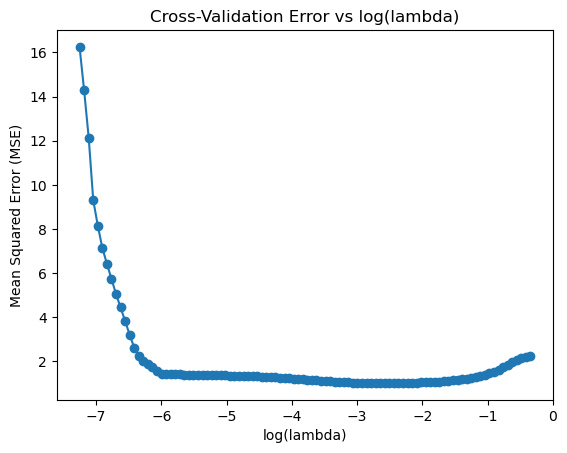

Optimal lambda (alpha) from cross-validation: 0.057520910664963655
Intercept: 2.3697719208308397
Coefficients: [ 0.91951256  0.87662592 -0.          0.         -0.11654472  0.
 -0.          0.         -0.          0.        ]
Mean Squared Error (MSE) on test set: 0.8542634641806279
R-squared on test set: 0.555685426962732


In [70]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Step 1: Generate polynomial features X, X^2, ..., X^10
np.random.seed(42)
n = 100
X = np.random.normal(0, 1, n)
epsilon = np.random.normal(0, 1, n)

# Coefficients for the true model
beta_0 = 2
beta_1 = 1.5
beta_2 = 0.5
beta_3 = -0.2

# Response variable y
y = beta_0 + beta_1*X + beta_2*(X**2) + beta_3*(X**3) + epsilon

# Polynomial Features
poly = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly.fit_transform(X.reshape(-1, 1))  # Create X, X^2, ..., X^10

# Step 2: Standardize the data (Lasso is sensitive to the scale of predictors)
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

# Step 3: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_poly_scaled, y, test_size=0.2, random_state=42)

# Step 4: Fit LassoCV to perform cross-validation and select the optimal lambda
lasso_cv = LassoCV(cv=10, random_state=42, max_iter=10000)  # 10-fold cross-validation
lasso_cv.fit(X_train, y_train)

# Step 5: Plot cross-validation error as a function of lambda (alphas_)
mse_path = lasso_cv.mse_path_.mean(axis=1)
alphas = lasso_cv.alphas_

plt.plot(np.log(alphas), mse_path, marker='o')
plt.xlabel('log(lambda)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Cross-Validation Error vs log(lambda)')
plt.show()

# Step 6: Report the optimal lambda and the coefficients
optimal_lambda = lasso_cv.alpha_
print(f"Optimal lambda (alpha) from cross-validation: {optimal_lambda}")

# Report coefficients
coefficients = lasso_cv.coef_
intercept = lasso_cv.intercept_
print("Intercept:", intercept)
print("Coefficients:", coefficients)

# Step 7: Predict on the test set and evaluate the model
y_pred = lasso_cv.predict(X_test)

# Evaluate the model performance
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE) on test set:", mse)
print("R-squared on test set:", r2)


### Response Vector Y 

Now generate a response vector Y according to the model
Y =$B_#$0 +$B_#7^X$7 +E",
and perform forward stepwise selection and the lasso. Discuss
the results obtained.

In [72]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Step 1: Generate the data based on Y = beta_0 + beta_7 * X^7 + epsilon
np.random.seed(42)
n = 100  # number of samples
X = np.random.normal(0, 1, n)  # Predictor X
epsilon = np.random.normal(0, 1, n)  # Random noise

# Define coefficients
beta_0 = 2
beta_7 = 3  # Assume a coefficient for X^7

# Simulate the response Y
y = beta_0 + beta_7 * (X ** 7) + epsilon

# Create a DataFrame with polynomial features X, X^2, ..., X^10
poly = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly.fit_transform(X.reshape(-1, 1))  # Create X, X^2, ..., X^10

# Create a DataFrame with predictors and response
df = pd.DataFrame(X_poly, columns=[f'X^{i}' for i in range(1, 11)])
df['y'] = y

# Step 2: Forward Stepwise Selection
def forward_stepwise_selection(data, response):
    predictors = list(data.columns)
    predictors.remove(response)  # All predictors except the response
    selected_predictors = []
    best_models = []
    
    while predictors:
        best_score = float('inf')
        best_predictor = None
        for predictor in predictors:
            model = sm.OLS(data[response], sm.add_constant(data[selected_predictors + [predictor]])).fit()
            aic = model.aic
            if aic < best_score:
                best_score = aic
                best_predictor = predictor
        
        selected_predictors.append(best_predictor)
        predictors.remove(best_predictor)
        best_models.append((selected_predictors.copy(), best_score))
        print(f'Added {best_predictor}, AIC: {best_score:.4f}')
    
    return best_models[-1]  # Return the final model

# Perform forward stepwise selection
best_forward_model = forward_stepwise_selection(df, 'y')
print("Best model (forward selection):", best_forward_model)

# Step 3: Lasso Regression with Cross-Validation
# Standardize the predictors
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_poly_scaled, y, test_size=0.2, random_state=42)

# Fit LassoCV to perform cross-validation and select the optimal lambda
lasso_cv = LassoCV(cv=10, random_state=42, max_iter=10000)  # 10-fold cross-validation
lasso_cv.fit(X_train, y_train)

# Report the optimal lambda and the coefficients
optimal_lambda = lasso_cv.alpha_
print(f"Optimal lambda (alpha) from cross-validation: {optimal_lambda}")

# Report coefficients
coefficients = lasso_cv.coef_
intercept = lasso_cv.intercept_
print("Intercept:", intercept)
print("Coefficients:", coefficients)

# Step 4: Predict on the test set and evaluate the model
y_pred = lasso_cv.predict(X_test)

# Evaluate the model performance
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE) on test set:", mse)
print("R-squared on test set:", r2)


Added X^7, AIC: 276.5087
Added X^2, AIC: 272.5824
Added X^9, AIC: 271.7956
Added X^5, AIC: 273.3750
Added X^3, AIC: 274.9664
Added X^4, AIC: 276.6481
Added X^8, AIC: 277.2497
Added X^6, AIC: 278.0767
Added X^10, AIC: 279.3998
Added X^1, AIC: 280.6387
Best model (forward selection): (['X^7', 'X^2', 'X^9', 'X^5', 'X^3', 'X^4', 'X^8', 'X^6', 'X^10', 'X^1'], 280.6386692365453)
Optimal lambda (alpha) from cross-validation: 0.32033956689524656
Intercept: -32.379136168732735
Coefficients: [ -0.           0.           0.          -0.          22.0359321
  -4.5957911  190.0561259   -0.          44.40102739  -0.        ]
Mean Squared Error (MSE) on test set: 8.50341927146273
R-squared on test set: 0.9968766811472833


    The predictors were added one by one based on AIC values. The final model selected all 10 predictors, starting with $X^7$, which is the true predictor in the data generation process.Best Model (Forward Selection): The best model selected the following terms:  $X^7$,$X^6$,$X^5$,$X^4$,$X^3$,$X^2$,$X^1$,
The final AIC for this model is 280.639.Even though the true model is 𝑌= $B_0$+ $B_7X^7$+  +ϵ, the forward stepwise method added several other predictors.Forward selection tends to select additional terms based on their marginal contribution to reducing AIC, even if they aren't part of the true model.The optimal regularization parameter selected by LassoCV was 𝜆 =0.32.Most coefficients were set to zero, as expected with Lasso. However, it retained $𝑋^7$  as well as some other predictors, with the largest coefficients being for $𝑋^7$ and $𝑋^9$. $𝑋^7$ isCoefficient of around 22, which aligns with the true model where Coefficient of around 22, which aligns with the true model where is the $𝑋^7$ most important predictor.Other predictors like $𝑋^9$ and $𝑋^5$ also had non-zero coefficients, though their presence could be due to multicollinearity or noise.
    Mean Squared Error (MSE): The MSE on the test set was 8.50, which indicates a reasonable fit given the random noise in the data generation process.The $R^2$ value on the test set was 0.997, indicating that the model explains about 99.7% of the variance in the response variable 
𝑌. This suggests that both models perform well in terms of predictive power.orward selection was able to select  $𝑋^7$ early in the process, which is the true predictor. This indicates that forward selection can be effective in identifying important variables.Weaknesses: However, forward stepwise added many additional terms that were not part of the true model (e.g., $𝑋^7,X^9$) This happens because AIC rewards improvement in model fit without heavily penalizing the inclusion of more predictors, leading to overfitting.Lasso was able to shrink many of the coefficients to zero, performing variable selection. Importantly, Lasso correctly identified $𝑋^7$ as a key predictor by assigning it a large non-zero coefficient.Lasso also retained a few additional predictors ($𝑋^9$ and $𝑋^5$ ) that are not part of the true data-generating process. This could be due to multicollinearity or noise in the data.
    Both forward stepwise selection and Lasso were able to capture $𝑋^7$, the true predictor in the model. However, Lasso had the advantage of shrinking several unnecessary predictors to zero, whereas forward stepwise selection added more terms than necessary. Lasso is generally better at preventing overfitting due to its regularization, making it more suited for high-dimensional data or situations where multicollinearity is present.
